<a href="https://colab.research.google.com/github/imazzala/Introduccion-Machine-Learning-Pytorch/blob/main/Implementacion_Regresion_Lineal_Y_Logistica_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Librerías:



*   **torch.nn**: es el módulo de redes neuronales de Pytorch. Dentro de él se encuentran los elementos de la regresión lineal. 
*   **torch.optim**: este módulo tiene los elementos de optimización. Con el podemos calcular los gradientes y realizar backpropagation.



In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Regresión Lineal


El problema se centra en explicar las unidades vendidas de automóviles explicadas por los precios. 

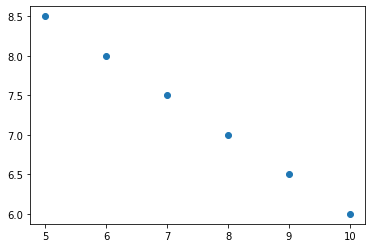

In [3]:
car_prices = [5, 6, 7, 8, 9, 10]
unit_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, unit_sold)

Convertimos el array de Python a uno de numpy para luego poder pasarlo al formato de tensor de Pytorch. Se debe notar que reescribimos el array en forma de columnas

In [15]:
prices_array = np.array(car_prices).reshape(-1, 1)
units_array = np.array(unit_sold).reshape(-1, 1)

Convertimos los array en Tensores. Vamos a requerir el gradiente sobre la variable prices, por ese motivo se agrega al final el método "requires_grad_". Los guiones bajos implican que se va a modificar el tensor para aplicar los gradientes.

In [22]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()
prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

Creamos el modelo

El método linear recibe las dimensiones de entrada y salida. En este caso 1 para ambos. 

Recordemos que el proceso de aprendizaje consta de 3 etapas:



*   **Forward Pass**: Ejecutar la predicción
*   **BackPropagation**: Analizar si las predicciones son correctas en distintas iteraciones
*   **Optimización**: A partir de buscar el mínimo de la función Loss a través del gradiente descendente.


La función de Loss o pérdida es la que se busca minimzar, también se encuentra dentro del módulo nn. 

El optimizador SDG (Stocastic gradient Decendent) se utiliza para hallar el mínimo de una función.  El algoritmo toma un punto aleatorio de la función (de ahí el nombre estocástico), luego calcula el gradiente y se desplaza hasta alcanzar el mínimos de la función. Los pasos que recorre el algoritmo está asociado al learning rate. Si los pasos son pocos, es posible que el algoritmo no encuentre el mínimo. Si los pasos son muchos, puede sobrepasarse eternamente del mínimo generando un bucle infinito. 

loss.backward(): calcula dloss/dx para cada parámetro que tiene requires_grad = True. Esto se acumula en x.grad para cada parámetro de x. En seudocódigo sería x.grad += dloss/dx.

Optimizer.step(): actualiza el valor de x utilizando x.grad. En este caso con el optimizador SGD el sistema ejecuta x += -lr * x.grad

Optimizer.zero(): limpia x.grad para cada parámetro por el optimizador. Es importante llamar a esta función antes del loss.backward, ya que caso contrario acumula los gradientes de pasos anteriores.

Link super útil https://www.youtube.com/watch?v=A6FiCDoz8_4

0.01975010707974434


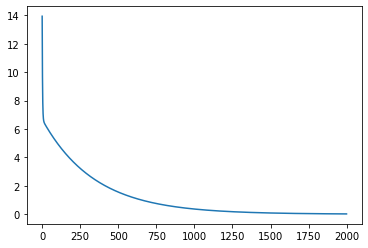

In [33]:
model = nn.Linear(1, 1)
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.015)

losses = []
iterations = 2000

for i in range(iterations):
  pred = model(prices)
  loss = loss_function(pred, units)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(float(loss))
plt.plot(range(iterations), losses)

Calculamos una predicción

Vemos que tiene lógica el resultado, ya que si el precio es de 4, se vende mayor cantidad de unidades tal como se esperaba.

In [34]:
x = torch.Tensor([4.0])
p = model(x)
p

tensor([8.6887], grad_fn=<AddBackward0>)

# Regresión Logística


En primer lugar se van a generar una serie de datos aleatorios, que se van a seprar de forma que sea más obvia la clasificación. Luego se va a generar el modelo y finalmente se realizará una predicción.

En primer lugar generamos una serie de datos aleatorios con Numpy y los centramos entre x = (-3, 3)  y = (-3, 3)


In [8]:
n = 100
h = 100 // 2
dimen = 2

data = np.random.randn(n, dimen)*3
data

array([[ 5.74649031,  2.63967778],
       [-0.90556563, -3.38724773],
       [-0.83065969, -0.77012099],
       [ 0.62066994,  1.16985876],
       [-0.67452066,  0.62216291],
       [-1.4392291 , -0.13289983],
       [-0.0277925 , -1.28520331],
       [ 4.67937819, -5.4311756 ],
       [ 3.60964277, -2.36907319],
       [-4.6164862 , -6.84896384],
       [-4.62071388, -3.45540733],
       [-1.18302891,  0.90004881],
       [-4.73369619, -2.64392859],
       [ 4.09136709,  2.17293994],
       [-0.37037926, -0.19200806],
       [-0.6038084 ,  2.17505601],
       [-2.20026894, -3.27572479],
       [-1.13770957,  1.71415847],
       [-1.4254546 ,  1.43851619],
       [ 2.2415645 ,  1.00835683],
       [-0.32950133, -1.16303523],
       [ 3.17028302,  8.62721751],
       [ 0.58792138, -0.21176478],
       [ 1.82435802, -0.15126692],
       [-4.17132477, -1.22136286],
       [ 0.24089787,  0.38382447],
       [-0.62629323, -5.34875572],
       [ 1.1413572 , -4.1073515 ],
       [-1.33151646,

Tomamos la primer columna como x y la segunda como y

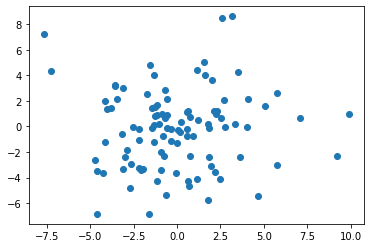

In [9]:
plt.scatter(data[:,0], data[:,1])

Vamos a reorganizar los datos para que queden más centrados entre dos grupos bien visibles centrados 3 y -3.

In [13]:
data[:h,:] = data[:h, :] - 3 * np.ones((h, dimen))

In [14]:
data[h:,:] = data[h:,:] + 3 * np.ones((h, dimen)) 

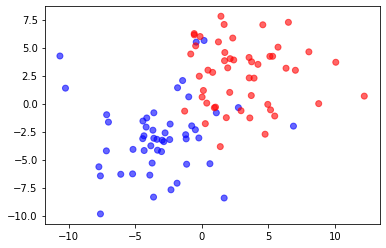

In [19]:
colors = ['blue', 'red']
color = np.array([colors[0]] * h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c = color, alpha = 0.6)

Creamos un array para los targets. 100 unidades con 0 y 1 y creamos los tensores

In [23]:
target = np.array([0] * h + [1]*h).reshape(n,1)
x = torch.from_numpy(data).float().requires_grad_(True)
y = torch.from_numpy(target).float()
x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

Creamos el modelo

En este caso necesitamos el modelo lineal y la función sigmoide. El método nn.Sequential nos permite combinar estas dos fuciones.

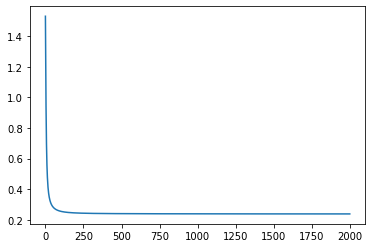

In [30]:
model = nn.Sequential(
        nn.Linear(2,1), 
        nn.Sigmoid()
        )

loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.015)

losses = []
iterations = 2000

for i in range(iterations):
  result = model(x)
  loss = loss_function(result, y)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(range(iterations), losses)


In [35]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])

blue
red


La mayor dificultad del modelo se encuentra en la zona media donde se produce la división entre los grupos. Para visualizarlo es necesario utilizar los parámetros del modelo. 

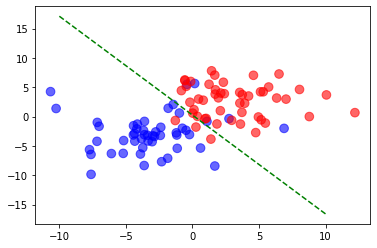

In [38]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c = color, s = 75, alpha = 0.6)

x_axis = np.linspace(-10, 10, n)
y_axis = -(w1[0] + x_axis * w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis, 'g--')